In [51]:
# set up the python
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cft
import cftime
import IPython.display
import sys, os, warnings
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)
import matplotlib.ticker as mticker

In [52]:
session = cc.database.create_session()

In [53]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/41827/status,
Dashboard: /proxy/41827/status,Workers: 7
Total threads: 28,Total memory: 200.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45833,Workers: 7
Dashboard: /proxy/41827/status,Total threads: 28
Started: Just now,Total memory: 200.00 GiB
Comm: tcp://127.0.0.1:46393,Total threads: 4
Dashboard: /proxy/41387/status,Memory: 28.57 GiB
Nanny: tcp://127.0.0.1:41271,


In [54]:
# time period
start_time = '1985-01-01'
end_time = '2000-01-01'

In [55]:
# time period
start_time1 = '1985-01-01'
end_time1 = '1990-01-01'
start_time2 = '1990-01-01'
end_time2 = '1995-01-01'
start_time3 = '1995-01-01'
end_time3 = '2000-01-01'
start_time4 = '2000-01-01'
end_time4 = '2005-01-01'
start_time5 = '2005-01-01'
end_time5 = '2010-01-01'
start_time6= '2010-01-01'
end_time6 = '2015-01-01'

In [56]:
# laod 01 deg SSH
ssh1 = cc.querying.getvar(expt='01deg_jra55v13_iaf', variable='eta_t', 
                          session=session, frequency='1 daily',
                          start_time='1984-12-30 00:00:00', 
                          end_time='2017-12-30 00:00:00').sel(time = slice(start_time1,end_time1)).sel(yt_ocean = slice(-90,-40))
ssh2 = cc.querying.getvar(expt='01deg_jra55v13_iaf', variable='eta_t', 
                          session=session, frequency='1 daily',
                          start_time='1984-12-30 00:00:00', 
                          end_time='2017-12-30 00:00:00').sel(time = slice(start_time2,end_time2)).sel(yt_ocean = slice(-90,-40))
ssh3 = cc.querying.getvar(expt='01deg_jra55v13_iaf', variable='eta_t', 
                          session=session, frequency='1 daily',
                          start_time='1984-12-30 00:00:00', 
                          end_time='2017-12-30 00:00:00').sel(time = slice(start_time3,end_time3)).sel(yt_ocean = slice(-90,-40))
ssh4 = cc.querying.getvar(expt='01deg_jra55v13_iaf', variable='eta_t', 
                          session=session, frequency='1 daily',
                          start_time='1984-12-30 00:00:00', 
                          end_time='2017-12-30 00:00:00').sel(time = slice(start_time4,end_time4)).sel(yt_ocean = slice(-90,-40))
ssh5 = cc.querying.getvar(expt='01deg_jra55v13_iaf', variable='eta_t', 
                          session=session, frequency='1 daily',
                          start_time='1984-12-30 00:00:00', 
                          end_time='2017-12-30 00:00:00').sel(time = slice(start_time5,end_time5)).sel(yt_ocean = slice(-90,-40))
ssh6 = cc.querying.getvar(expt='01deg_jra55v13_iaf', variable='eta_t', 
                          session=session, frequency='1 daily',
                          start_time='1984-12-30 00:00:00', 
                          end_time='2017-12-30 00:00:00').sel(time = slice(start_time6,end_time6)).sel(yt_ocean = slice(-90,-40))

Exception during reset or similar
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/sqlalchemy/pool/base.py", line 697, in _finalize_fairy
    fairy._reset(pool)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/sqlalchemy/pool/base.py", line 893, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/sqlalchemy/engine/default.py", line 558, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 22510875608896 and this is thread id 22507310999296.
Exception closing connection <sqlite3.Connection object at 0x1478989405d0>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/sqlalchemy/pool/b

In [57]:
# load zonal trans
trans1 = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='tx_trans', 
                          session=session, frequency='1 monthly',
                          start_time='1984-12-31 00:00:00', 
                          end_time='2017-11-30 00:00:00').sel(yt_ocean = slice(-90,-40)).sel(time=slice(start_time1,end_time1))
trans2 = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='tx_trans', 
                          session=session, frequency='1 monthly',
                          start_time='1984-12-31 00:00:00', 
                          end_time='2017-11-30 00:00:00').sel(yt_ocean = slice(-90,-40)).sel(time=slice(start_time2,end_time2))
trans3 = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='tx_trans', 
                          session=session, frequency='1 monthly',
                          start_time='1984-12-31 00:00:00', 
                          end_time='2017-11-30 00:00:00').sel(yt_ocean = slice(-90,-40)).sel(time=slice(start_time3,end_time3))
trans4 = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='tx_trans', 
                          session=session, frequency='1 monthly',
                          start_time='1984-12-31 00:00:00', 
                          end_time='2017-11-30 00:00:00').sel(yt_ocean = slice(-90,-40)).sel(time=slice(start_time4,end_time4))
trans5 = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='tx_trans', 
                          session=session, frequency='1 monthly',
                          start_time='1984-12-31 00:00:00', 
                          end_time='2017-11-30 00:00:00').sel(yt_ocean = slice(-90,-40)).sel(time=slice(start_time5,end_time5))
trans6 = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='tx_trans', 
                          session=session, frequency='1 monthly',
                          start_time='1984-12-31 00:00:00', 
                          end_time='2017-11-30 00:00:00').sel(yt_ocean = slice(-90,-40)).sel(time=slice(start_time6,end_time6))

2022-07-25 10:48:58,464 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)
2022-07-25 10:48:58,686 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2022-07-25 10:48:58,724 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2022-07-25 10:48:58,767 - distributed.utils_perf - WARNING - full garbage collections took 30% CPU time recently (threshold: 10%)
2022-07-25 10:48:58,925 - distributed.utils_perf - WARNING - full garbage collections took 29% CPU time recently (threshold: 10%)
2022-07-25 10:48:58,942 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2022-07-25 10:48:59,012 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
2022-07-25 10:48:59,055 - distributed.utils_perf - WARNING - full garbage collections took

In [58]:
# load bathymetry
dz = cc.querying.getvar(expt='01deg_jra55v13_iaf', variable='dzt', 
                          session=session, frequency='1 monthly',
                          start_time='1984-12-31 00:00:00', 
                          end_time='2017-11-30 00:00:00').sel(yt_ocean = slice(-90,-40)).sel(time=slice(start_time1,end_time1))

2022-07-25 10:49:14,598 - distributed.utils_perf - WARNING - full garbage collections took 30% CPU time recently (threshold: 10%)
2022-07-25 10:49:15,615 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)
2022-07-25 10:49:15,920 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)
2022-07-25 10:49:17,375 - distributed.utils_perf - WARNING - full garbage collections took 30% CPU time recently (threshold: 10%)
2022-07-25 10:49:17,383 - distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)
2022-07-25 10:49:17,390 - distributed.utils_perf - WARNING - full garbage collections took 30% CPU time recently (threshold: 10%)
2022-07-25 10:49:17,390 - distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)
2022-07-25 10:49:17,397 - distributed.utils_perf - WARNING - full garbage collections took

In [59]:
# compute ssh
ssh1 = ssh1.mean('time').load()
ssh2 = ssh2.mean('time').load()
ssh3 = ssh3.mean('time').load()
ssh4 = ssh4.mean('time').load()
ssh5 = ssh5.mean('time').load()
ssh6 = ssh6.mean('time').load()

2022-07-25 10:49:34,860 - distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)
2022-07-25 10:49:34,879 - distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)
2022-07-25 10:49:37,754 - distributed.utils_perf - WARNING - full garbage collections took 28% CPU time recently (threshold: 10%)
2022-07-25 10:49:39,621 - distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
2022-07-25 10:49:42,140 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2022-07-25 10:49:47,432 - distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)
2022-07-25 10:49:47,792 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2022-07-25 10:49:53,120 - distributed.utils_perf - WARNING - full garbage collections took

In [60]:
# calculate the mean ssh
ssh = (ssh1+ssh2+ssh3+ssh4+ssh5+ssh6)/6.

In [61]:
# compute flux
flux1 = (trans1.mean('time').cumsum('yt_ocean').sum('st_ocean')/1e9).load()
flux2 = (trans2.mean('time').cumsum('yt_ocean').sum('st_ocean')/1e9).load()
flux3 = (trans3.mean('time').cumsum('yt_ocean').sum('st_ocean')/1e9).load()
flux4 = (trans4.mean('time').cumsum('yt_ocean').sum('st_ocean')/1e9).load()
flux5 = (trans5.mean('time').cumsum('yt_ocean').sum('st_ocean')/1e9).load()
flux6 = (trans6.mean('time').cumsum('yt_ocean').sum('st_ocean')/1e9).load()

In [62]:
flux = (flux1+flux2+flux3+flux4+flux5+flux6)/6.

In [63]:
# divide weddell ross
flux1 = flux.sel(xu_ocean  = slice(-60,70))
flux2 = flux.sel(xu_ocean = slice(-190,-100))


In [64]:
# divide AABG
flux3 = flux.sel(xu_ocean = slice(-280,-230))

In [65]:
flux_smooth = flux.interp(yt_ocean = np.arange(-81,-40,1), xu_ocean= np.arange(-280,80,1),method='linear')

In [66]:
flux_smooth1 = flux.interp(yt_ocean = np.arange(-81,-40,1.5), xu_ocean= np.arange(-280,80,1.5),method='linear')

In [67]:
# compute depth
depth1 = dz.mean('time').sum('st_ocean').load()

In [68]:
# contour of Kurguelen Plateau
depth2 = depth1.sel(yt_ocean = slice(-64,-40)).load()

In [69]:
# contour of 1000m isobath
depth4 =  depth1.sel(yt_ocean = slice(-90,-55)).load()

In [70]:
# flux of -5sv
flux_asc1 = flux_smooth.sel(yt_ocean = slice(-90,-65)).sel(xu_ocean = slice(-70,78)).load()
flux_asc2 = flux.sel(yt_ocean = slice(-90,-64)).sel(xu_ocean = slice(77,80)).load()
flux_asc3 = flux.sel(yt_ocean = slice(-90,-64)).sel(xu_ocean = slice(-280,-276)).load()
flux_asc4 = flux_smooth.sel(yt_ocean = slice(-90,-63.5)).sel(xu_ocean = slice(-277,-220)).load()
flux_asc5 = flux_smooth.sel(yt_ocean = slice(-90,-65)).sel(xu_ocean = slice(-220,-190)).load()

In [71]:
# the contour of ACC front 
ssh_front = ssh.sel(yt_ocean = slice(-70,-40)).load()

In [72]:
# get the depth
depth = cc.querying.getvar('panant-01-zstar','deptho',session,n=1)
land_mask = np.squeeze(depth.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)

# Make some contours of Weddell Ross and AABG

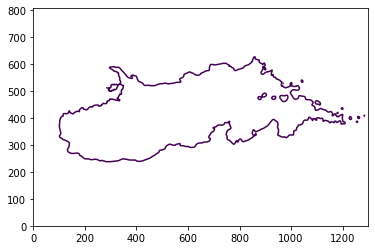

In [73]:
# Weddell
xu_ocean = flux1.xu_ocean
yt_ocean = flux1.yt_ocean
count = 0
x_contour = []
y_contour = []
# Create the contour:
sc = plt.contour(flux1, levels=[-14])

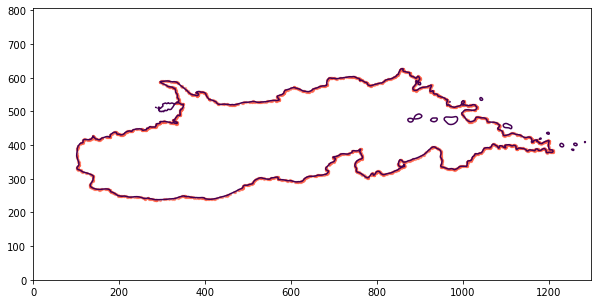

In [74]:
for collection in sc.collections:
    for path in collection.get_paths():
        count += 1
        #print(np.shape(path.to_polygons()[0]))
        if count > 1: 
            # We only need the polygon from the first contour, which is the circumpolar contour
            break
        else:
            # Write down the lat/lon indices
            for ii in range(np.size(path.to_polygons()[0], 0)):
                x_contour.append(int(np.round(path.to_polygons()[0][ii][0])))
                y_contour.append(int(np.round(path.to_polygons()[0][ii][1])))

# convert list to array
x_contour = np.asarray(x_contour)
y_contour = np.asarray(y_contour)

# define a array
x_weddell = np.zeros(1849)
y_weddell = np.zeros(1849)

x = np.shape(y_contour)
x

fig = plt.figure(figsize=(10,5))
plt.contour(flux1, levels=[-14])
plt.scatter(x_contour, y_contour, s=5, alpha=0.5, color='tomato');

In [75]:
for i in range(1849):
    for j in range(1849):
        x_weddell[i] = xu_ocean[x_contour[i]]
        y_weddell[j] = yt_ocean[y_contour[j]]

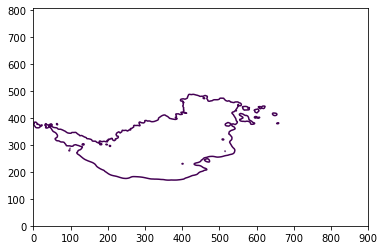

In [76]:
# Ross
xu_ocean = flux2.xu_ocean
yt_ocean = flux2.yt_ocean
count = 0
x_contour = []
y_contour = []
# Create the contour:
sc = plt.contour(flux2, levels=[-16])

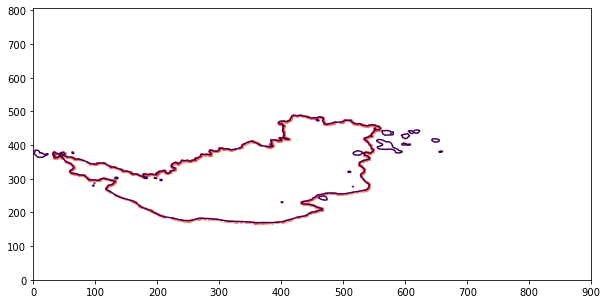

In [77]:
for collection in sc.collections:
    for path in collection.get_paths():
        count += 1
        #print(np.shape(path.to_polygons()[0]))
        if count > 1: 
            # We only need the polygon from the first contour, which is the circumpolar contour
            break
        else:
            # Write down the lat/lon indices
            for ii in range(np.size(path.to_polygons()[0], 0)):
                x_contour.append(int(np.round(path.to_polygons()[0][ii][0])))
                y_contour.append(int(np.round(path.to_polygons()[0][ii][1])))

# convert list to array
x_contour = np.asarray(x_contour)
y_contour = np.asarray(y_contour)

# define a array
x_ross = np.zeros(982)
y_ross = np.zeros(982)

x = np.shape(y_contour)
x

fig = plt.figure(figsize=(10,5))
plt.contour(flux2, levels=[-16])
plt.scatter(x_contour, y_contour, s=5, alpha=0.5, color='tomato');

In [78]:
x = np.shape(y_contour)
x

(982,)

In [79]:
for i in range(982):
    for j in range(982):
        x_ross[i] = xu_ocean[x_contour[i]]
        y_ross[j] = yt_ocean[y_contour[j]]

###### 

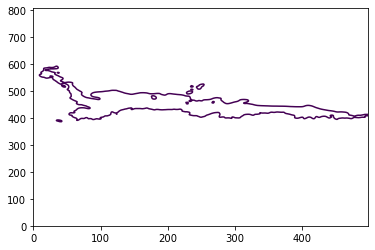

In [80]:
# AABG
xu_ocean = flux3.xu_ocean
yt_ocean = flux3.yt_ocean
count = 0
x_contour = []
y_contour = []
# Create the contour:
sc = plt.contour(flux3, levels=[-13])

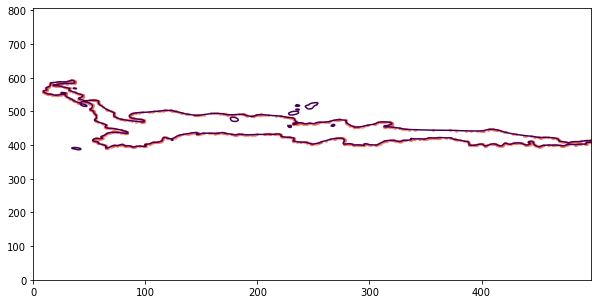

In [81]:
for collection in sc.collections:
    for path in collection.get_paths():
        count += 1
        #print(np.shape(path.to_polygons()[0]))
        if count > 1: 
            # We only need the polygon from the first contour, which is the circumpolar contour
            break
        else:
            # Write down the lat/lon indices
            for ii in range(np.size(path.to_polygons()[0], 0)):
                x_contour.append(int(np.round(path.to_polygons()[0][ii][0])))
                y_contour.append(int(np.round(path.to_polygons()[0][ii][1])))

# convert list to array
x_contour = np.asarray(x_contour)
y_contour = np.asarray(y_contour)

# define a array
x_AABG = np.zeros(961)
y_AABG = np.zeros(961)

x = np.shape(y_contour)
x

fig = plt.figure(figsize=(10,5))
plt.contour(flux3, levels=[-13])
plt.scatter(x_contour, y_contour, s=5, alpha=0.5, color='tomato');

In [82]:
x = np.shape(y_contour)
x

(961,)

In [83]:
for i in range(961):
    for j in range(961):
        x_AABG[i] = xu_ocean[x_contour[i]]
        y_AABG[j] = yt_ocean[y_contour[j]]

In [84]:
# combine them together
x_gyre = [x_weddell,x_ross,x_AABG]
y_gyre = [y_weddell,y_ross,y_AABG]

In [85]:
x_gyre

[array([-31.4, -31.6, -31.8, ..., -31.4, -31.4, -31.4]),
 array([-154.3, -154.6, -155. , -155.3, -155.7, -156.5, -157.1, -157.5,
        -157.9, -158.2, -158.4, -158.7, -159.1, -159.8, -160.4, -160.8,
        -161.2, -161.6, -162.3, -162.8, -163.1, -163.3, -163.5, -163.7,
        -164.3, -164.5, -164.7, -164.9, -165.1, -165.3, -165.7, -166. ,
        -166.2, -166.6, -167.1, -167.5, -167.7, -168.9, -169.1, -169.3,
        -169.5, -169.7, -169.9, -170.2, -170.4, -170.7, -170.8, -170.9,
        -171. , -171.1, -171.3, -171.6, -172. , -172.4, -172.6, -172.8,
        -172.9, -173. , -173.4, -173.5, -173.7, -173.9, -174.1, -174.4,
        -175.1, -175.5, -176.1, -176.3, -176.6, -176.8, -177.6, -177.8,
        -178.1, -178.2, -178.3, -178.3, -178.1, -178. , -177.9, -177.9,
        -177.8, -177.4, -177.4, -177.3, -177.2, -177.1, -177. , -176.9,
        -176.8, -176.8, -176.8, -176.9, -177. , -177.2, -177.3, -177.4,
        -177.7, -177.9, -178.2, -178.5, -178.6, -178.7, -178.8, -179.2,
       

Text(0, 0.5, 'SSH (cm)')

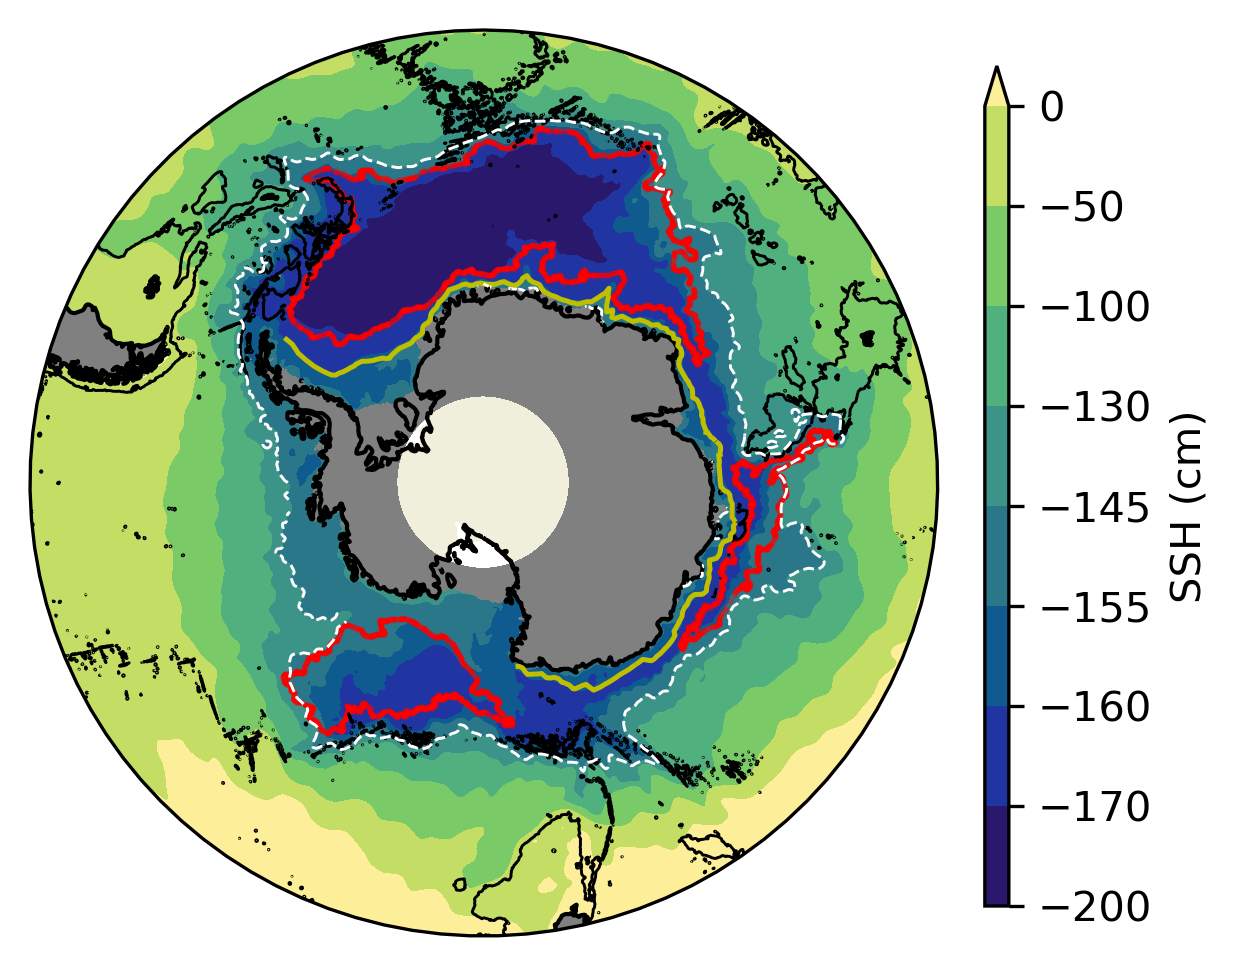

In [86]:
# plot the intro map
projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(4, 4), dpi=300)
ax = plt.subplot(1,1,1,projection = projection)
#ax.gridlines(draw_labels=True)
theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = (ssh*100.).plot.contourf(ax=ax, levels =[-200,-170,-160,-155,-145,-130,-100,-50,0],transform=ccrs.PlateCarree(),
                              cmap=cm.cm.haline,add_colorbar = False)
depth2.plot.contour(ax=ax,levels=[2500],linewidths = 0.7,colors=['k'],transform=ccrs.PlateCarree())
#flux_smooth1.plot.contour(ax=ax,levels=[-14],linewidths = 0.7,colors=['r'],linestyles = 'solid', transform=ccrs.PlateCarree())
plt.scatter(x_AABG, y_AABG,s = 0.15,alpha=0.5, color='red',transform=ccrs.PlateCarree())
plt.scatter(x_ross, y_ross,s = 0.15,alpha=0.5, color='red',transform=ccrs.PlateCarree())
plt.scatter(x_weddell, y_weddell,s = 0.15,alpha=0.5, color='red',transform=ccrs.PlateCarree())
flux_asc1.plot.contour(ax=ax,levels=[-3],linewidths = 1.2,colors=['y'],linestyles = 'solid', transform=ccrs.PlateCarree())
flux_asc2.plot.contour(ax=ax,levels=[-3],linewidths = 1.2,colors=['y'],linestyles = 'solid', transform=ccrs.PlateCarree())
flux_asc3.plot.contour(ax=ax,levels=[-3],linewidths = 1.2,colors=['y'],linestyles = 'solid', transform=ccrs.PlateCarree())
flux_asc4.plot.contour(ax=ax,levels=[-3],linewidths = 1.2,colors=['y'],linestyles = 'solid', transform=ccrs.PlateCarree())
flux_asc5.plot.contour(ax=ax,levels=[-3],linewidths = 1.2,colors=['y'],linestyles = 'solid', transform=ccrs.PlateCarree())
(ssh_front*100).plot.contour(ax=ax,levels=[-145],linewidths = 0.7,colors=['white'],linestyles = 'dashed',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-45], crs = ccrs.PlateCarree())

# colorbar 
ax = plt.axes([0.93, 0.15, 0.02, 0.7])
cb = plt.colorbar(p1, cax=ax, orientation='vertical',extend = 'both')
cb.ax.set_ylabel('SSH (cm)')

# Now try to use PV = f/h to describe the 

In [116]:
from gsw import f

In [117]:
# load the ocean depth data
h = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='ht', 
                          session=session, frequency='static',
                          attrs={'cell_methods': 'time: point'}, n=1).sel(yt_ocean = slice(-90,-45))

In [118]:
h

<xarray.DataArray 'ht' (yt_ocean: 740, xt_ocean: 3600)>
dask.array<getitem, shape=(740, 3600), dtype=float32, chunksize=(675, 900), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... -45.18 -45.11 -45.04
    geolon_t  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>
    geolat_t  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>
Attributes:
    long_name:      ocean depth on t-cells
    units:          m
    valid_range:    [-1.e+09  1.e+09]
    cell_methods:   time: point
    standard_name:  sea_floor_depth_below_geoid
    ncfiles:        ['/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf90...
    contact:        Andy Hogg
    email:          andy.hogg@anu.edu.au
    created:        2020-06-11
    description:    0.1 degree ACCESS-OM2 global model configuration under th...
    notes:          Additional daily outputs saved from 1 Jan 1950 to 31 Dec ...

In [119]:
# compute the f(s-1) in each latitude
yt_ocean = h.yt_ocean
xt_ocean = h.xt_ocean

f = xr.DataArray(f(yt_ocean), coords = [yt_ocean], dims = ['yt_ocean'], name = 'coriolis parameter', attrs = {'units':'s-1'})

In [120]:
f

<xarray.DataArray 'coriolis parameter' (yt_ocean: 740)>
array([-0.00014409, -0.00014407, -0.00014406, -0.00014404, -0.00014402,
       -0.00014401, -0.00014399, -0.00014397, -0.00014395, -0.00014394,
       -0.00014392, -0.0001439 , -0.00014388, -0.00014387, -0.00014385,
       -0.00014383, -0.00014381, -0.0001438 , -0.00014378, -0.00014376,
       -0.00014374, -0.00014372, -0.00014371, -0.00014369, -0.00014367,
       -0.00014365, -0.00014363, -0.00014361, -0.00014359, -0.00014357,
       -0.00014356, -0.00014354, -0.00014352, -0.0001435 , -0.00014348,
       -0.00014346, -0.00014344, -0.00014342, -0.0001434 , -0.00014338,
       -0.00014336, -0.00014334, -0.00014332, -0.0001433 , -0.00014328,
       -0.00014326, -0.00014324, -0.00014322, -0.0001432 , -0.00014318,
       -0.00014316, -0.00014314, -0.00014312, -0.0001431 , -0.00014308,
       -0.00014306, -0.00014304, -0.00014302, -0.00014299, -0.00014297,
       -0.00014295, -0.00014293, -0.00014291, -0.00014289, -0.00014287,
       -0.00014284, -0.00014282, -0.0001428 , -0.00014278, -0.00014276,
       -0.00014274, -0.00014271, -0.00014269, -0.00014267, -0.00014265,
       -0.00014262, -0.0001426 , -0.00014258, -0.00014256, -0.00014253,
       -0.00014251, -0.00014249, -0.00014246, -0.00014244, -0.00014242,
       -0.0001424 , -0.00014237, -0.00014235, -0.00014233, -0.0001423 ,
       -0.00014228, -0.00014225, -0.00014223, -0.00014221, -0.00014218,
       -0.00014216, -0.00014214, -0.00014211, -0.00014209, -0.00014206,
...
       -0.00011431, -0.00011421, -0.00011411, -0.00011401, -0.00011391,
       -0.00011381, -0.00011371, -0.00011361, -0.00011351, -0.00011341,
       -0.00011331, -0.00011321, -0.00011311, -0.00011301, -0.0001129 ,
       -0.0001128 , -0.0001127 , -0.0001126 , -0.00011249, -0.00011239,
       -0.00011229, -0.00011218, -0.00011208, -0.00011198, -0.00011187,
       -0.00011177, -0.00011166, -0.00011156, -0.00011145, -0.00011134,
       -0.00011124, -0.00011113, -0.00011102, -0.00011092, -0.00011081,
       -0.0001107 , -0.00011059, -0.00011048, -0.00011038, -0.00011027,
       -0.00011016, -0.00011005, -0.00010994, -0.00010983, -0.00010972,
       -0.00010961, -0.0001095 , -0.00010939, -0.00010927, -0.00010916,
       -0.00010905, -0.00010894, -0.00010883, -0.00010871, -0.0001086 ,
       -0.00010849, -0.00010837, -0.00010826, -0.00010814, -0.00010803,
       -0.00010791, -0.0001078 , -0.00010768, -0.00010757, -0.00010745,
       -0.00010733, -0.00010722, -0.0001071 , -0.00010698, -0.00010686,
       -0.00010675, -0.00010663, -0.00010651, -0.00010639, -0.00010627,
       -0.00010615, -0.00010603, -0.00010591, -0.00010579, -0.00010567,
       -0.00010555, -0.00010543, -0.00010531, -0.00010518, -0.00010506,
       -0.00010494, -0.00010482, -0.00010469, -0.00010457, -0.00010445,
       -0.00010432, -0.0001042 , -0.00010407, -0.00010395, -0.00010382,
       -0.0001037 , -0.00010357, -0.00010344, -0.00010332, -0.00010319])
Coordinates:
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... -45.18 -45.11 -45.04
Attributes:
    units:    s-1

In [121]:
f = f.values

In [122]:
f

array([-0.00014409, -0.00014407, -0.00014406, -0.00014404, -0.00014402,
       -0.00014401, -0.00014399, -0.00014397, -0.00014395, -0.00014394,
       -0.00014392, -0.0001439 , -0.00014388, -0.00014387, -0.00014385,
       -0.00014383, -0.00014381, -0.0001438 , -0.00014378, -0.00014376,
       -0.00014374, -0.00014372, -0.00014371, -0.00014369, -0.00014367,
       -0.00014365, -0.00014363, -0.00014361, -0.00014359, -0.00014357,
       -0.00014356, -0.00014354, -0.00014352, -0.0001435 , -0.00014348,
       -0.00014346, -0.00014344, -0.00014342, -0.0001434 , -0.00014338,
       -0.00014336, -0.00014334, -0.00014332, -0.0001433 , -0.00014328,
       -0.00014326, -0.00014324, -0.00014322, -0.0001432 , -0.00014318,
       -0.00014316, -0.00014314, -0.00014312, -0.0001431 , -0.00014308,
       -0.00014306, -0.00014304, -0.00014302, -0.00014299, -0.00014297,
       -0.00014295, -0.00014293, -0.00014291, -0.00014289, -0.00014287,
       -0.00014284, -0.00014282, -0.0001428 , -0.00014278, -0.00

In [124]:
f_1 = np.zeros((740,3600))
for i in range(740):
    f_1[i,:] = f[i]

In [125]:
depth_inverse = (f_1/h).load()

In [126]:
f_1

array([[-0.00014409, -0.00014409, -0.00014409, ..., -0.00014409,
        -0.00014409, -0.00014409],
       [-0.00014407, -0.00014407, -0.00014407, ..., -0.00014407,
        -0.00014407, -0.00014407],
       [-0.00014406, -0.00014406, -0.00014406, ..., -0.00014406,
        -0.00014406, -0.00014406],
       ...,
       [-0.00010344, -0.00010344, -0.00010344, ..., -0.00010344,
        -0.00010344, -0.00010344],
       [-0.00010332, -0.00010332, -0.00010332, ..., -0.00010332,
        -0.00010332, -0.00010332],
       [-0.00010319, -0.00010319, -0.00010319, ..., -0.00010319,
        -0.00010319, -0.00010319]])

In [127]:
depth_inverse

<xarray.DataArray 'ht' (yt_ocean: 740, xt_ocean: 3600)>
array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       ...,
       [-3.57712805e-08, -3.53962224e-08, -2.97934489e-08, ...,
        -3.06447590e-08, -3.02442821e-08, -2.98908885e-08],
       [-3.09725383e-08, -3.24743875e-08, -2.97569746e-08, ...,
        -2.97595234e-08, -3.09665437e-08, -3.09665437e-08],
       [-2.97204101e-08, -2.93963496e-08, -2.90319142e-08, ...,
        -3.00681948e-08, -3.14020822e-08, -3.09284929e-08]])
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... -45.18 -45.11 -45.04
    geolon_t  (yt_ocean, xt_ocean) float32 nan nan nan nan ... 79.75 79.85 79.95
    geolat_t  (yt_ocean, xt_ocean) float32 nan nan nan ... -45.04 -45.04 -45.04
Attributes:
    long_name:      ocean depth on t-cells
    units:          m
    valid_range:    [-1.e+09  1.e+09]
    cell_methods:   time: point
    standard_name:  sea_floor_depth_below_geoid
    ncfiles:        ['/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf90...
    contact:        Andy Hogg
    email:          andy.hogg@anu.edu.au
    created:        2020-06-11
    description:    0.1 degree ACCESS-OM2 global model configuration under th...
    notes:          Additional daily outputs saved from 1 Jan 1950 to 31 Dec ...

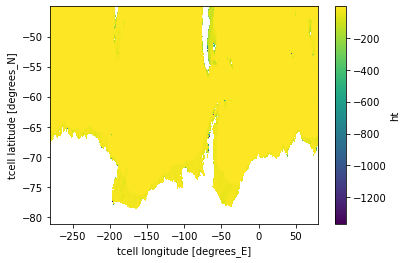

In [128]:
(depth_inverse*1e8).plot()

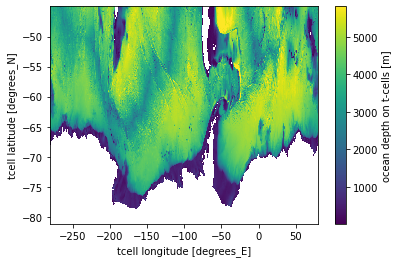

In [129]:
h.plot()

Text(0, 0.5, '(f/h $10^{-8}$m$^{-1}$ s$^{-1}$)')

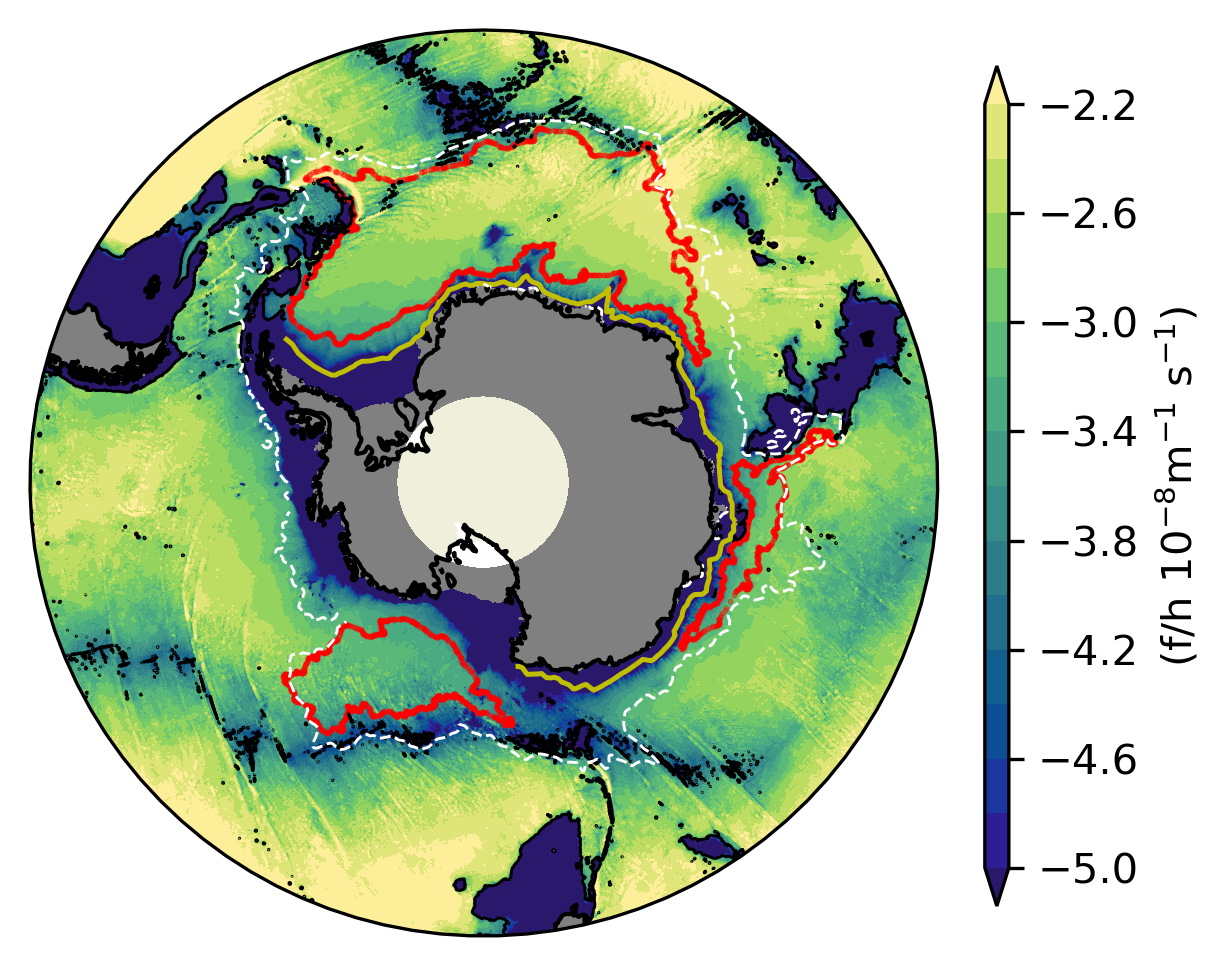

In [131]:
# plot the intro map
projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(4, 4), dpi=300)
ax = plt.subplot(1,1,1,projection = projection)
#ax.gridlines(draw_labels=True)
theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = (depth_inverse*1e8).plot.contourf(ax=ax, levels =np.arange(-5,-2,0.2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.haline,add_colorbar = False)
depth2.plot.contour(ax=ax,levels=[2500],linewidths = 0.7,colors=['k'],transform=ccrs.PlateCarree())
#flux_smooth1.plot.contour(ax=ax,levels=[-14],linewidths = 0.7,colors=['r'],linestyles = 'solid', transform=ccrs.PlateCarree())
plt.scatter(x_AABG, y_AABG,s = 0.15,alpha=0.5, color='red',transform=ccrs.PlateCarree())
plt.scatter(x_ross, y_ross,s = 0.15,alpha=0.5, color='red',transform=ccrs.PlateCarree())
plt.scatter(x_weddell, y_weddell,s = 0.15,alpha=0.5, color='red',transform=ccrs.PlateCarree())
flux_asc1.plot.contour(ax=ax,levels=[-3],linewidths = 1.2,colors=['y'],linestyles = 'solid', transform=ccrs.PlateCarree())
flux_asc2.plot.contour(ax=ax,levels=[-3],linewidths = 1.2,colors=['y'],linestyles = 'solid', transform=ccrs.PlateCarree())
flux_asc3.plot.contour(ax=ax,levels=[-3],linewidths = 1.2,colors=['y'],linestyles = 'solid', transform=ccrs.PlateCarree())
flux_asc4.plot.contour(ax=ax,levels=[-3],linewidths = 1.2,colors=['y'],linestyles = 'solid', transform=ccrs.PlateCarree())
flux_asc5.plot.contour(ax=ax,levels=[-3],linewidths = 1.2,colors=['y'],linestyles = 'solid', transform=ccrs.PlateCarree())
(ssh_front*100).plot.contour(ax=ax,levels=[-145],linewidths = 0.7,colors=['white'],linestyles = 'dashed',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-45], crs = ccrs.PlateCarree())

# colorbar 
ax = plt.axes([0.93, 0.15, 0.02, 0.7])
cb = plt.colorbar(p1, cax=ax, orientation='vertical',extend = 'both')
cb.ax.set_ylabel('(f/h $10^{-8}$m$^{-1}$ s$^{-1}$)')

In [102]:
depth_inverse*1e8

<xarray.DataArray 'ht' (yt_ocean: 666, xt_ocean: 3600)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-3.08737781, -3.10944388, -3.09875935, ..., -3.06414463,
        -3.02779774, -3.02779774],
       [-3.10253312, -3.10253312, -3.12442136, ..., -3.00896687,
        -3.02496851, -2.99161664],
       [-3.0163541 , -2.99876837, -3.05352075, ..., -2.96508986,
        -2.9840565 , -2.98027689]])
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... -50.16 -50.09 -50.03
    geolon_t  (yt_ocean, xt_ocean) float32 nan nan nan nan ... 79.75 79.85 79.95
    geolat_t  (yt_ocean, xt_ocean) float32 nan nan nan ... -50.03 -50.03 -50.03